# <font color='blue'>MAI5002 - Fundamentos de Matemática Aplicada</font>

## <font color='blue'>Ortogonalidade - Solução dos Exercícios </font>

### Material produzido por Luis Gustavo Nonato 

ICMC-USP

----

In [22]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)
O arquivo `teste_matriz.dat` (disponível para download no repositório) armazena uma matriz com 10 linhas e 7 colunas. Leia a matriz e verifique se as colunas são ortogonais.

In [6]:
# Solução

X = np.loadtxt('teste_matrix.dat') # carregando a matriz

# Para verificar se as colunas são ortogonais basta verificar se 
# o produto escalar entre duas coluns distintas é igual a zero
# para isto, basta multiplicarmos X.T por X e verificarmos se
# os elementos fora da diagonal são zero

np.set_printoptions(precision=4,suppress=True)
print(np.dot(X.T,X))

# como os elementos fora da diagonal são zero até a quarta casa decimal,
# podemos considerar que as colunas são ortogonais

[[ 1.  0.  0.  0. -0. -0. -0.]
 [ 0.  1.  0. -0. -0.  0. -0.]
 [ 0.  0.  1.  0. -0.  0. -0.]
 [ 0. -0.  0.  1. -0. -0.  0.]
 [-0. -0. -0. -0.  1. -0. -0.]
 [-0.  0.  0. -0. -0.  1.  0.]
 [-0. -0. -0.  0. -0.  0.  1.]]


### Exercício 2)
Construa uma transformação linear que leva vetores de $\mathbb{R}^5$ para o sub-espaço $\mathcal{S}$ gerado pelos vetores $[1,1,1]$ e $[0,0,1]$ em $\mathbb{R}^3$. Verificar que a transformação obtida está realizando o mapeamento corretamente.

In [12]:
# Lembrando que uma transformação linear leva o espaço linha no espaço coluna
# a matriz deve ter dimensão 3x5
# Além disso, os vetores [1,1,1] e [0,0,1] devem estar entre as colunas
# e as demais colunas devem ser combinações lineares destes vetores

# criando a matriz
A = np.zeros((3,5))

# garantindo os vetores [1,1,1] e [0,0,1] com colunas
A[:,:2] = np.array([[1,1,1],[0,0,1]]).T

# gerando as demais colunas como cobinação das duas primeiras
# os coeficientes da combinação são armazenados na matriz c 2x3 (cada coluna um par de coeficientes)
c = np.array([[1,1, 2],[-1,1,-1]])

A[:,2:] = np.dot(A[:,:2],c)
print(A)

[[1. 0. 1. 1. 2.]
 [1. 0. 1. 1. 2.]
 [1. 1. 0. 2. 1.]]


In [13]:
# Um teste simples para verificar que a transformação A está de fato mapeando vetores de R5 para o 
# plano S gerado por (1,1,1) e (0,0,1) é encontrar um vetor v ortogonal à S e
# checar que qualquer vetor mapeado pela transformação é ortogonal à v

v = np.cross(A[:,0],A[:,1]).reshape(3,1)  # produto vetorial entre as duas primeiras colunas de A
                                          # v é ortogonal a (1,1,1) e (0,0,1), portanto ortogonal a S

for i in range(10): 
  x = np.random.uniform(low=-1,high=1,size=(5,1)) # gerando um vetor randomido em R5
  u = np.dot(A,x)         # realizando o mapeamento
  print(np.dot(u.T,v))    # verificando ortogonalidade

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]


### Exercício 3)
Construa uma transformação linear $\mathbf{A}:\mathbb{R}^5\rightarrow\mathbb{R}^3$ de modo que os vetores $[1,1,0,0,0]$ e $[0,1,0,0,0]$ sejam o complemento ortogonal do espaço linha.
Vefique que a transformação encontrada está correta.

In [19]:
# Solução

# Se os vetores [1,1,0,0,0] e [0,1,0,0,0] estão no complemento ortogonal 
# do espação linha, então eles geram o espaço núcleo.
# Como os vetores estão em R5, precisamos encontrar 3 vetores ortogonais 
# aos vetores dados e que sejam LI para formarmos uma
# base para o espaço linha.

# Neste caso, tais vetores pondem ser [0,0,1,0,0], [0,0,0,1,0] e [0,0,0,0,1]
# Para verificar que a trasformação esta correta, basta checar se ele leva os vetores 
# do espaço núcleo no vetor nulo em R3.

A = np.array([[0,0,1,0,0],
              [0,0,0,1,0],
              [0,0,0,0,1]])

v1 = np.array([1,1,0,0,0])
v2 = np.array([0,1,0,0,0])

print(np.dot(A,v1))
print(np.dot(A,v2))

[0 0 0]
[0 0 0]


### Exercício 4)
Construa uma transformação linear que mapeia o hiperplano $x_1+x_2+x_3+x_4+x_5=0$ para o  espaço $\mathbb{R}^2$ e visualize o resultado da transformação para alguns pontos gerados sobre o plano.

In [26]:
# Solução

# A matriz de transformação deve ter 2x5
# Como sabemos,  uma transformação linear mapeia o espaço das linhas para o 
# espaço das colunas. Se encontrarmos 2 vetores sobre o hiperplano que sejam LI
# podemos usar estes pontos como vetores linha da transformação.
# Para isto, basta encontrarmos dois pontos que satisfaçam a equação x_1+x_2+x_3+x_4+x_5=0
# por exemplo: [1,0,-1,0,0] e [0,-1,0,2,-1]

A = np.array([[1,0,-1,0,0],[0,-1,0,2,-1]])

# para gerar pontos sobre o plano basta atribuirmos valores para x_1+x_2+x_3+x_4
# e calcularmos x_5 = -x_1-x_2-x_3-x_4
# vamos gerar 100 pontos sobre o hiperplano e armazena-los como colunas de uma matriz X

X = np.random.uniform(-1,1,size=(5,100))
X[-1] = -np.sum(X[:-1],axis=0)

# verificando que os pontos em X satisfazem a equação do plano
print(np.sum(X,axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


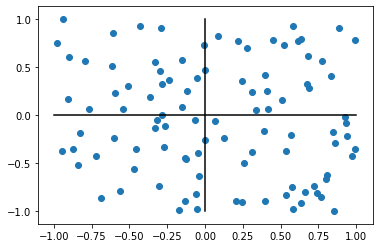

In [27]:
# para visualizar o resultado da transformação, basta aplicar o transformação A na matrix X
# e plotar os pontos gerados

M = np.dot(A,X)  # a matrix M contém os pontos em R2 em suas colunas

# plotando os eixos 
plt.plot([-1,1],[0,0],color='k')
plt.plot([0,0],[-1,1],color='k')

# plotando os pontos
plt.scatter(X[0,:],X[1,:])

### Exercício 5)
No exercício anterior, podemos afirmar que qualquer ponto  (diferente de $[0,0]$) sobre o hiperplano $x_1+x_2+x_3+x_4+x_5=0$ será mapeado para um ponto diferente de $[0,0]$ em $\mathbb{R}^2$? Em caso afirmativo justifique sua resposta, em caso negativo, dê exemplo de um ponto sobre no hiperplano que é mapeado na origem do espaço $\mathbb{R}^2$.

**Solução**
O hiperplano $x_1+x_2+x_3+x_4+x_5=0$ corresponde a um subspaço de dimensão 4 em $\mathbb{R}^5$ (justifique esta afirmação). Portanto, os vetores $\mathbf{a}_1=[1,0,-1,0,0]$ e $\mathbf{a}_2=[0,-1,0,2,-1]$ (espaço das linhas da matriz $\mathbf{A}$) geram um subspaço de dimensão 2 contido no hiperplano.

Logo, existem dois vetores no espaço nulo da transformação $\mathbf{A}$ que estão contidos no hiperplano (justifique esta afirmação). Como são vetores do espaço nulo, serão mapeados para [0,0] pela transformação $\mathbf{A}$.

Para encontrar tais vetores do hiperplano contidos no espaço nulo de $\mathbf{A}$ temos que resolver o seguinte sistema de equações:

$$
\mathbf{x}^\top\mathbf{a}_1=0    \qquad\mbox{#ortogonalidade com } \mathbf{a}_1\\
\mathbf{x}^\top\mathbf{a}_2=0    \qquad\mbox{#ortogonalidade com } \mathbf{a}_2\\
\mathbf{x}^\top\mathbf{1\!\!1}=0 \qquad\mbox{#pertence ao hiperplano } 
$$
onde $\mathbf{1\!\!1}=[1,1,1,1,1]$. Ou seja:

$$
\begin{matrix}
x_1-x_3=0\\
-x_2+2x_4-x_5=0\\
x_1+x_2+x_3+x_4+x_5=0\\
\end{matrix}\longrightarrow
\begin{matrix}
x_1=x_3=-\frac{3}{2}x_4\\
x_2=2x_4-x_5
\end{matrix}
$$

Atribuindo valores para $x_4=1$, $x_5=0$ e $x_4=0$, $x_5=1$ encontramos dois vetores
no hiperplano que estão no espaço nulo da transformação, os quais são:

$$
y_1 = [-3/2,2,-3/2,1,0]\quad y_2=[0,-1,0,0,1]
$$

In [33]:
# Verificando que os pontos do espaço gerado pelos vetores y1 e y2 estão no hiperplano

y1 = np.array([-3/2,2,-3/2,1,0])
y2 = np.array([0,-1,0,0,1])

# gerando coeficientes para a combinação linear de y1 e y2
a = 1
b = 1
z = a*y1+b*y2

# verificando se z está no hiperplano x_1+x_2+x_3+x_4+x_5=0
n = np.array([1,1,1,1,1])
print('ponto z=a*y1+b*y2 pertence ao plano?',np.abs(np.dot(n.T,z))<1e-5)

# mapeando o ponto z via transformação A
print('A imagem de z=',z,'pela transformação A é',np.dot(A,z))

ponto z=a*y1+b*y2 pertence ao plano? True
A imagem de z= [-1.5  1.  -1.5  1.   1. ] pela transformação A é [0. 0.]


### Exercício 6) 
Considere a transformação linear dada pela matriz 
$$
\left(\begin{array}{ccccccc}
3 & 9 & 6 & 6 & 9 & 3 & 1\\
2 & 0 & 9 & 2 & 0 & 5 & 3\\
0 & 0 & 1 & 0 & 1 & 0 & 2
\end{array}\right)
$$

a) Qual a dimensão do núcleo da transformação?<br>
b) Encontre uma base para o espaço núcleo.<br>
c) Verifique que a base encontrada está gerando o  núcleo.

In [14]:
# Solução
B = np.asarray([[3, 9, 6, 6, 9, 3, 1],
                [2, 0, 9, 2, 0, 5, 3],
                [0, 0, 1 , 0, 1, 0, 2]])

# Sabemos que dim(nucleo)+dim(imagem)=7 
# Como temos três colunas L.I. na matriz B, sabemos que a 
# dim(imagem)=3, logo, a dim(nucleo)=4. 

# Para mostrar que dim(imagem)=3, basta verificar
# que o determinante da matriz gerada por três vetores coluna é diferente de zero  
# Por exemplo, as três primeiras colunas de B
# são linearmente independentes, pois o determinante da matriz 
# gerada por elas é diferente de zero

print('\nDeterminante de\n',B[:,0:3],' = ',np.linalg.det(B[:,0:3]))

print('\nDimensão do núcleo de\n',B,'\n é 4')


Determinante de
 [[3 9 6]
 [2 0 9]
 [0 0 1]]  =  -17.999999999999996

Dimensão do núcleo de
 [[3 9 6 6 9 3 1]
 [2 0 9 2 0 5 3]
 [0 0 1 0 1 0 2]] 
 é 4


**Encontrando uma base para o espaço núcleo**

Sabemos que o espaço núcleo é ortogonal ao espaço linha, portanto, vetores no espaço núcleo devem satisfazer as equações:
$$
Bx=0 \\
\Downarrow \\
\begin{array}{c}
3x_1 + 9x_2 + 6x_3 +6x_4 +9x_5 +3x_6 +1x_7 = 0\\
2x_1 + 0x_2 + 9x_3 +2x_4 +0x_5 +5x_6 +3x_7 = 0\\
0x_1 + 0x_2 + 1x_3 +0x_4 +1x_5 +0x_6 +2x_7 = 0
\end{array}
\\
\Downarrow 
$$
Da segunda equação temos:
$$
x_1=\frac{-9x_3 -2x_4 -5x_6 -3x_7}{2}
$$
Substituindo na primeira equação:
$$
x_2=\frac{5}{6}x_3 -\frac{1}{3}x_4 -x_5 +\frac{1}{2}x_6 +\frac{7}{18}x_7
$$
Isolando $x_3$ na terceira equação:
$$
x_3=-1x_5-2x_7
$$
Desta forma, temos liberdade para escolhermos $x_4,x_5,x_6,x_7$. Fazendo um deles iguais a 1 e os demais iguais a zero, obtemos uma base.

In [15]:
base=np.zeros((7,4))
for i in range(4):
  v = np.zeros((7,1))
  v[i+3]=1
  v[2] = -v[4]-2*v[6]
  v[1] = 5/6*v[2]-1/3*v[3]-v[4]+1/2*v[5]+7/18*v[6]
  v[0] = -9/2*v[2]-v[3]-5/2*v[5]-3/2*v[6]
  base[:,i] = v[:,0]

print(base)

[[-1.      4.5    -2.5     7.5   ]
 [-0.3333 -1.8333  0.5    -1.2778]
 [-0.     -1.     -0.     -2.    ]
 [ 1.      0.      0.      0.    ]
 [ 0.      1.      0.      0.    ]
 [ 0.      0.      1.      0.    ]
 [ 0.      0.      0.      1.    ]]


In [17]:
# Verificando que os vetores calculados estão no núcleo

np.set_printoptions(precision=5,suppress=True)
print(np.dot(B,base))

[[ 0. -0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


### Exercício 7)
Sabemos que para toda transformação linear $\mathbf{X}$, os vetores que pertencem ao espaço linha de $\mathbf{X}$ são ortogonais aos vetores que estão no espaço nulo de $\mathbf{X}$.

Considerando a propriedade acima, construa uma transformação linear cujo núcleo (espaço nulo) é gerado pelos vetores $\mathbf{x}_1=[1,1,0,1]$ e $\mathbf{x}_2=[0,1,0,1]$.

**Solução**
O espaço nulo é um subespaço de $\mathbb{R}^4$ com dimensão 2, pois é gerado por dois vetores $\mathbf{x}_1$ e $\mathbf{x}_2$. Portanto, a dimensão do espaço linha também 2 (consequência do teorema do núcleo e da imagem). Ou seja, a matrix procurada terá 2 linhas e 4 colunas.

Para encontrar os dois vetores dos espaço linha utilizamos o resultado descrito noo exercício, ou seja, devemos encontrar dois vetores ortogonais a $\mathbf{x}_1$ e $\mathbf{x}_2$. Chamando os vetores procurados de $\mathbf{y}_1=[y_{11},y_{12},y_{13},y_{14}]$ e $\mathbf{y}_2=[y_{21},y_{22},y_{23},y_{24}]$, temos que:

$$
<\mathbf{y}_1,\mathbf{x}_1> = 0 \quad
<\mathbf{y}_1,\mathbf{x}_2> = 0 \quad
<\mathbf{y}_2,\mathbf{x}_1> = 0 \quad
<\mathbf{y}_2,\mathbf{x}_2> = 0
$$

Gerando o sistema de equações:

$$
\begin{matrix}
y_{11}+y_{12}+y_{14}=0\\
y_{12}+y_{14}=0\\
y_{21}+y_{22}+y_{24}=0\\
y_{22}+y_{24}=0
\end{matrix}
$$

Temos 4 equações e 8 incógnitas, portanto podemos atribuir 4 valores para 4 variáveis e determinarmos o restante. Fazendo: $y_{13}=0,y_{14}=1,y_{23}=1,y_{24}=1$ temos a solução:

$$
\mathbf{y}_1=[0,-1,0,1]\\
\mathbf{y}_2=[0,-1,1,1]
$$

Logo a matrix procurada é:
$$
\begin{bmatrix}
0 & -1 & 0 & 1\\
0 & -1 & 1 & 1\\
\end{bmatrix}
$$

In [7]:
#verificando a corretude da solucao

A = np.array([[0,-1,0,1],[0,-1,1,1]])

# tomando um vetor no espaço nulo
vn1 = np.array([1,1,0,1])
vn2 = np.array([0,1,0,1])
a = 1
b = 2
xn = a*vn1+b*vn2

# aplicando a transformação no vetor que pertence ao espaço nulo
print(np.dot(A,xn))

[0 0]


### Exercício 8)
Escreva um código para, dada uma base qualquer de um subespaço, encontrar uma base ortonormal para este mesmo subespaço. Teste o seu código para a base dada como colunas da matriz $\mathbf{V}$ gerada no código abaixo. Verifique que a base obtida é de fato ortonormal.

In [1]:
import numpy as np

V = np.random.randint(0,20,size=(20,10))
print(V)

[[17  7 10  0 16 14 13 14  0  0]
 [15  6 17  5  3 11 15 19  9  9]
 [ 9 12 19 13  8  8  9 12 17 17]
 [16  5 19  6  0 17  7 16 10  7]
 [ 0  4 14  9  1 19 17  3  1  9]
 [ 9  2 18 11 10 13  0 19  2  1]
 [12  1 14  4 11 16 10 17 14  9]
 [18 12 10 19 13 17  9  1  7  9]
 [ 2 18  1  7 17  4  8 12  5 12]
 [ 4  0 16  0 10  8 13  5 10 19]
 [ 5  3  8 14 12 11  8  0 14 12]
 [ 3 17  6  6 15 13  8 13  1 12]
 [ 6  8 10 16  7  7 11 15  8 11]
 [ 2 15  0 10  8 12  9  0  1 16]
 [ 1 15 18  7  3 15 11 14  2 15]
 [ 0 10 12 18 17 18  0  3  1  9]
 [19  9  1 19 13  9  7 19 12  4]
 [ 7 16  6 17 18 15  1 14  8  0]
 [ 6 13  3 13  3  9  5 18 16 10]
 [10 19  4 13 11  0  1  4 19 17]]


In [35]:
def gram_schmidt(x):
    q = np.zeros(x.shape)  # matriz cujas colunas são os elementos da base ortonormal
    
    q[:,0] = x[:,0]/np.linalg.norm(x[:,0]) # primeiro elemento da base
    for i in range(1,x.shape[1]):  # indice das colunas da base x
        coefs = np.array([np.dot(x[:,i].T,q[:,j]) for j in range(i)]).reshape(-1,1) # gera os coeficiente <x_i.T,q_j>
                                                                                    # e guarda em um vetor coluna
        q[:,i:i+1] = x[:,i:i+1] - np.dot(q[:,:i],coefs)
        q[:,i] = q[:,i]/np.linalg.norm(q[:,i])
        
    return(q)

In [39]:
Q = gram_schmidt(V)

np.set_printoptions(precision=2,suppress=True)

# para verificar a corretude basta checar se a matriz np.dot(Q.T,Q) é a identidade
print(np.dot(Q.T,Q))


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0. -0.]
 [ 0.  1. -0.  0. -0. -0.  0.  0. -0. -0.]
 [ 0. -0.  1.  0.  0. -0.  0.  0. -0. -0.]
 [ 0.  0.  0.  1.  0.  0. -0.  0.  0. -0.]
 [ 0. -0.  0.  0.  1.  0. -0. -0.  0.  0.]
 [ 0. -0. -0.  0.  0.  1. -0. -0. -0.  0.]
 [ 0.  0.  0. -0. -0. -0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0. -0. -0. -0.  1. -0.  0.]
 [ 0. -0. -0.  0.  0. -0.  0. -0.  1. -0.]
 [-0. -0. -0. -0.  0.  0. -0.  0. -0.  1.]]


### Exercício 9) 
Considere o espaço gerado pelos vetores $[1,1,1]$ e $[1,0,1]$. Construa uma base ortogonal para este espaço e encontre a projeção de qualquer ponto de $\mathbb{R}^3$ sobre plano gerado pelos vetores ortogonais.

In [1]:
import numpy as np

A = np.array([[1,1,1],[1,0,1]]).T

Q,R = np.linalg.qr(A) # as colunas de Q são a base ortogonal para o espaço gerado pelas colunas de A

# Calculando a projeção
# A projecao de um ponto x qualquer no espaço é 
# dada por dot(x.T,Q[:,0])*Q[:,0]+dot(x.T,Q[:,1])*Q[:,1]

x = np.random.uniform(-1,1,size=(3,1))

print('A projeção é:',np.dot(x.T,Q[:,0])*Q[:,0]+np.dot(x.T,Q[:,1])*Q[:,1])

A projeção é: [ 0.52428485 -0.26454486  0.52428485]
